In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
images=0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        images+=1
print('total number of images : ',images)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

total number of images :  7553


**Installing Dependencies**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
with_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
without_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')

In [4]:
print(f'with mask :{len(with_mask_files)}\nwithout mask : {len(without_mask_files)}')

with mask :3725
without mask : 3828


In [5]:
# creating labels for the dataset
labels = [1]*len(with_mask_files) + [0]*len(without_mask_files)

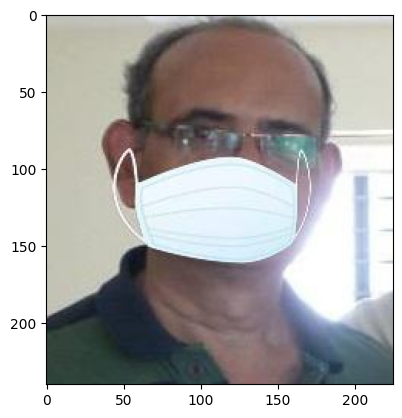

In [6]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1002.jpg')
imgplot = plt.imshow(img)
plt.show()

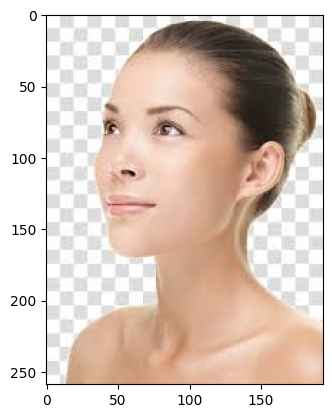

In [7]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [8]:
# convert to numpy array and resizing images

with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
type(data)

list

In [10]:
len(data)

7553

In [11]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [12]:
data[0].shape

(128, 128, 3)

In [13]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [14]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

In [15]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train, Test, Split**

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [18]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [19]:
X_train[0][0][0], X_train_scaled[0][0][0], X_test_scaled[0][0][0]

(array([48, 48, 60], dtype=uint8),
 array([0.18823529, 0.18823529, 0.23529412]),
 array([0.97254902, 0.97254902, 0.97254902]))